In [ ]:
RETURNS VOLATILITY 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
#load cleaned EDA data 
df = pd.read_csv("google_5yr_one.csv",index_col ='Date',parse_dates=True) 

In [4]:
#daily return

df['Daily Return']=df['Close'].pct_change

In [7]:
print(df.head()) 
print(df.columns) 
print(df['Daily Return'].dtype) 

                        Close               High                Low  \
Date                                                                  
NaT                     GOOGL              GOOGL              GOOGL   
2020-06-04   70.3785171508789  71.72309429138843  69.96599205492319   
2020-06-05  71.65840148925781   71.9709103787135   70.0461071028752   
2020-06-08  72.05748748779297  72.10525562528537  70.88509140875318   
2020-06-09  72.25852966308594  73.04079279119881  71.77484210279437   

                         Open    Volume  \
Date                                      
NaT                     GOOGL     GOOGL   
2020-06-04   71.4971694316438  26982000   
2020-06-05  70.44520002096422  42642000   
2020-06-08    70.974667107052  33878000   
2020-06-09  71.91816171630913  33624000   

                                                 Daily Return  
Date                                                           
NaT         <bound method NDFrame.pct_change of Date\nNaT ...  
2020-06-

In [14]:
# Convert to numeric, 
df['Daily Return'] = pd.to_numeric(df['Daily Return'], errors='coerce')

df['Daily Return'].fillna(0, inplace=True) 

C:\Users\HP\AppData\Local\Temp\ipykernel_32756\2419561444.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Daily Return'].fillna(0, inplace=True)


In [9]:
#Cumulative Return
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

In [10]:
#30-days Rolling Volatility
df['Rolling Volatility']=df['Daily Return'].rolling(window=30).std()


In [13]:
print(df['Daily Return'].isnull().sum())

df_cleaned = df.dropna(subset=['Daily Return'])
sharpe_ratio = (df_cleaned['Daily Return'].mean() / df_cleaned['Daily Return'].std()) * np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


0
Sharpe Ratio: nan


C:\Users\HP\AppData\Local\Temp\ipykernel_32756\4232070302.py:4: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio = (df_cleaned['Daily Return'].mean() / df_cleaned['Daily Return'].std()) * np.sqrt(252)


In [15]:
print(df['Daily Return'].std())
print(df['Daily Return'].nunique()) # Check number of unique values

0.0
1


In [7]:
#Daily return plot 

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("google_5yr_one.csv", index_col='Date', parse_dates=True)

df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(12, 5))
df['Daily Return'].plot(alpha=0.6)
plt.title("GOOGL Daily Returns")
plt.ylabel("Return")
plt.grid(True)
plt.show()


TypeError: unsupported operand type(s) for /: 'str' and 'str'

C:\Users\HP\AppData\Local\Temp\ipykernel_19128\3024750221.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Close'].fillna(method='ffill', inplace=True) # Forward fill NaNs
C:\Users\HP\AppData\Local\Temp\ipykernel_19128\3024750221.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Close'].fillna(method='ffill', inplace=True) # Forward fill NaNs


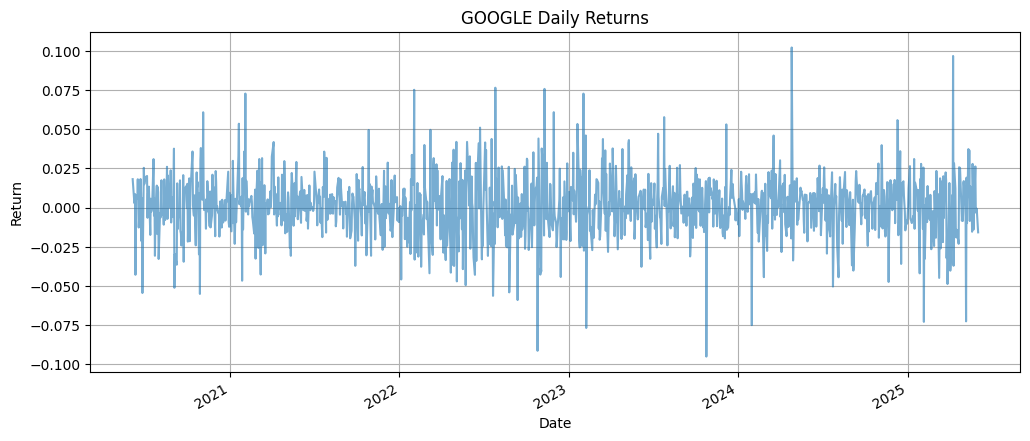

In [10]:

df = pd.read_csv("google_5yr_one.csv", index_col='Date', parse_dates=True)

df['Close'] = df['Close'].astype(str).str.replace(r'[^\d.]', '', regex=True)


df['Close'] = pd.to_numeric(df['Close'], errors='coerce')


df['Close'].fillna(method='ffill', inplace=True) # Forward fill NaNs


df['Daily Return'] = df['Close'].pct_change()

plt.figure(figsize=(12, 5))
df['Daily Return'].plot(alpha=0.6)
plt.title("GOOGLE Daily Returns")
plt.ylabel("Return")
plt.grid(True)
plt.show()

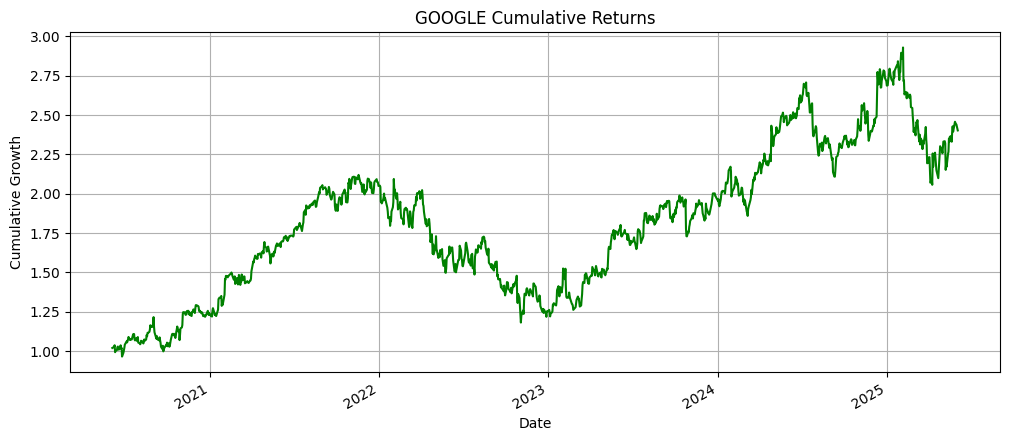

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df['Daily Return'] = df['Close'].pct_change()


df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()

plt.figure(figsize=(12, 5))
df['Cumulative Return'].plot(color='green')
plt.title("GOOGLE Cumulative Returns")
plt.ylabel("Cumulative Growth")
plt.grid(True)
plt.show()



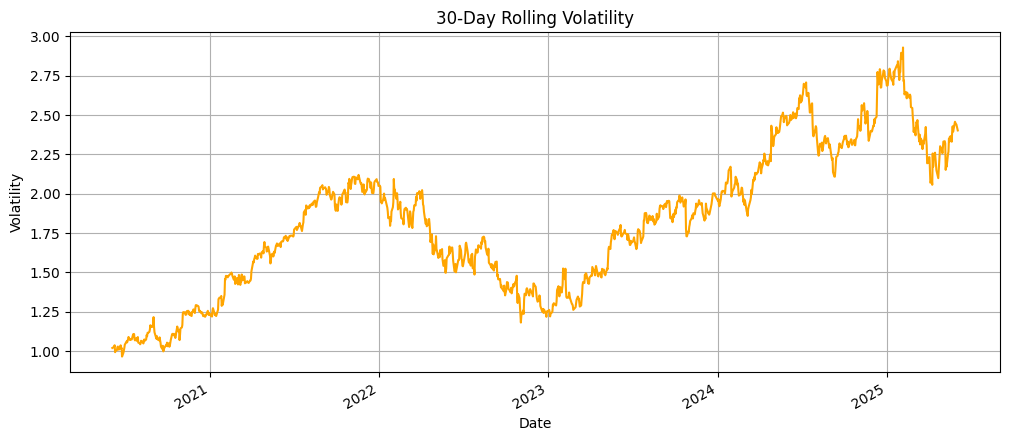

In [16]:
# Rolling volatility 


df['Daily Return'] = df['Close'].pct_change()


df['Rolling Volatility'] = (1 + df['Daily Return']).cumprod()

plt.figure(figsize=(12, 5))
df['Rolling Volatility'].plot(color='orange')
plt.title("30-Day Rolling Volatility")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()

In [17]:
df_returns_vol = df[['Close', 'Daily Return', 'Cumulative Return', 'Rolling Volatility']].copy()
df_returns_vol.to_csv("returns_volatility_output.csv")